# Classification prediction (Batch classifier comparison)


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import gridspec
import itertools

from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_circles

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


def models():
    return {
        'Logistic_Regression': LogisticRegression(),
        'Linear_SVM': LinearSVC(random_state=0),
        'Kernel_SVM': SVC(
            kernel='rbf',
            random_state=0
        ),
        'K_Neighbors': KNeighborsClassifier(),
        'Decision_Tree': DecisionTreeClassifier(
            max_depth=3,
            random_state=0
        ),
        'Random_Forest': RandomForestClassifier(
            max_depth=3,
            random_state=0
        )
    }


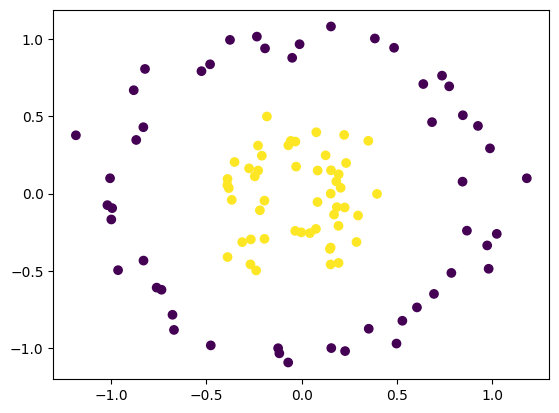

In [2]:
# Prepare dataset.
X_circle, y_circle = make_circles(
    random_state=48,
    n_samples=100,
    noise=0.1,
    factor=0.3
)

plt.scatter(
    X_circle[:, 0],
    X_circle[:, 1],
    c=y_circle
)
plt.show()

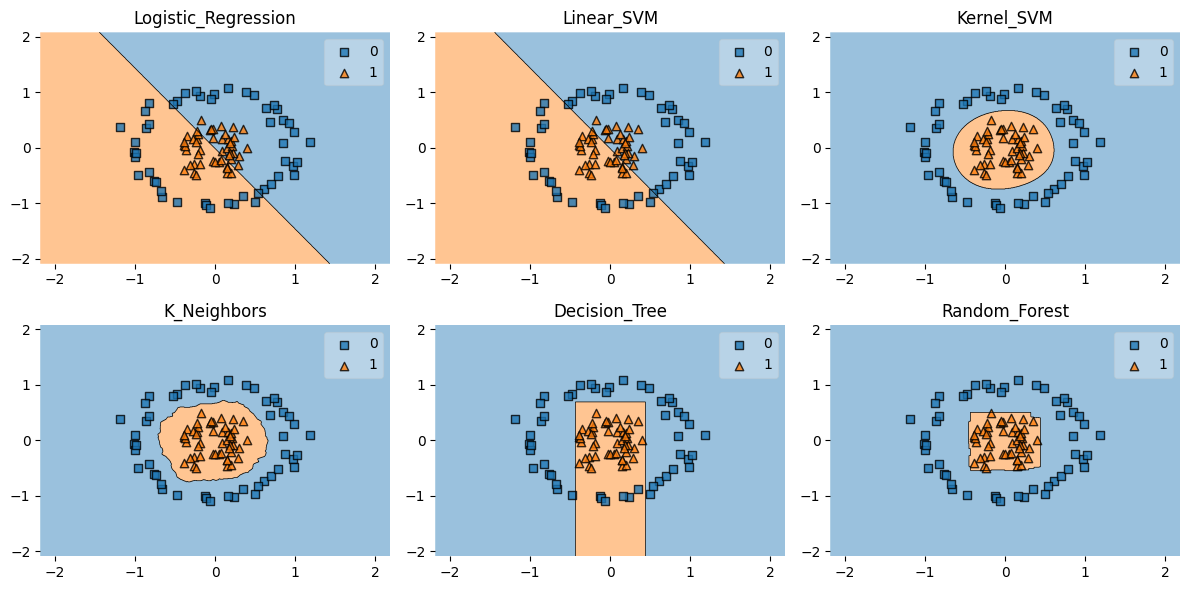

In [3]:
# Batch execution of construction model and Decision regions visualization.
grid_spec = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(12, 6))

target = zip(
    models().keys(),
    itertools.product(
        [0, 1, 2],
        repeat=2
    )
)

for classifier, plot_coordinates in target:
    model = models()[classifier].fit(
        X_circle,
        y_circle
    )
    ax = plt.subplot(grid_spec[
        plot_coordinates[0],
        plot_coordinates[1]
    ])
    fig = plot_decision_regions(
        X_circle,
        y_circle,
        clf=model
    )
    plt.title(classifier)

plt.tight_layout()
plt.show()